In [ ]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="TOKEN")

Job ID: d0c9x4mrxz8g008apmtg


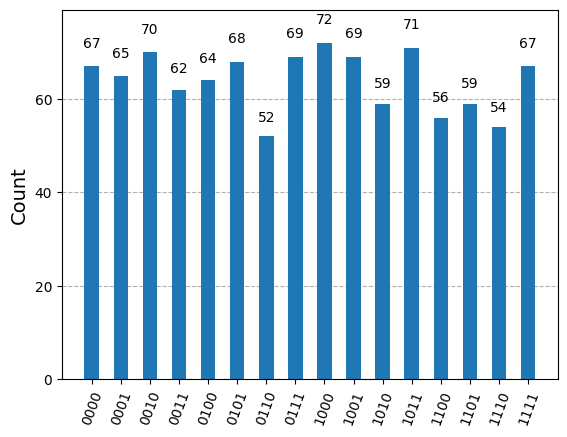

In [ ]:
# ------------------------------------------------------------
# Grover (|1010>)
# ------------------------------------------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import UnitaryGate
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

# -------- helpers --------
def oracle(n=4):
    diag = np.ones(2**n); diag[10] = -1       # 10 == 0b1010
    qc = QuantumCircuit(n)
    qc.append(UnitaryGate(np.diag(diag), label="Oracle"), range(n))
    return qc

def diffuser(n=4):
    qc = QuantumCircuit(n)
    qc.h(range(n)); qc.x(range(n))
    qc.h(n-1); qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1); qc.x(range(n)); qc.h(range(n))
    return qc

# -------- Grover circuit (k = 2 loops) --------
n, k = 4, 2
grover = QuantumCircuit(n)
grover.h(range(n))
for _ in range(k):
    grover.compose(oracle(n),   range(n), inplace=True)
    grover.compose(diffuser(n), range(n), inplace=True)
grover.measure_all()

# ====================================================
# Choose simulation or real Hardware
# ====================================================

USE_REAL = True
if USE_REAL:
    service  = QiskitRuntimeService()
    backend  = service.backend("ibm_sherbrooke")   # o lima, belem…
    grover_opt = transpile(grover, backend, optimization_level=2)
    sampler    = SamplerV2(mode=backend)
    job        = sampler.run([grover_opt], shots=1024)

else:
    from qiskit_aer import AerSimulator
    backend  = AerSimulator()                      # Ideal Simulator
    grover_opt = transpile(grover, backend, optimization_level=2)
    job        = backend.run(grover_opt, shots=1024)   # No Sampler

# -------- Transpile for the Backend --------
grover_opt = transpile(grover, backend, optimization_level=2)

# -------- Execute with SamplerV2 --------
sampler = SamplerV2(mode=backend)   # use the backend selected before
job     = sampler.run([grover_opt], shots=1024)

print("Job ID:", job.job_id())
counts  = job.result()[0].data.meas.get_counts()
display(plot_histogram(counts))

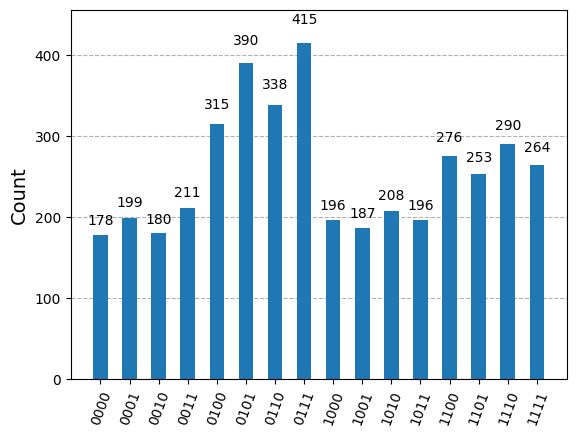

In [29]:
from qiskit_ibm_runtime import QiskitRuntimeService
service      = QiskitRuntimeService()
job_id       = "d0c74c16rr3g0087qzm0" # we can use any job id of a previous job
job          = service.job(job_id)    # fetch existing RuntimeJobV2
pub_result   = job.result()[0]
counts       = pub_result.data.meas.get_counts()

# Step 9: Plot results
from IPython.display import display
from qiskit.visualization import plot_histogram

hist_fig = plot_histogram(counts)  # returns a Matplotlib Figure
display(hist_fig)                  # shows it inline